<a href="https://colab.research.google.com/github/TmTrojcak/Computational_Physics/blob/main/Tyler_Trojcak_midterm_exam_S23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Directions

Complete each part to the best of your ability.  Add comments throughout to help me understand what you are doing and why.

### But first import pyplot and numpy!

In [1]:
# enter your code to import pyplot, numpy, and math
import math
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Functions


### Part 1a

(5 points)

#### Taylor series

From the [Wikipedia article](https://en.wikipedia.org/wiki/Taylor_series):

*In mathematics, the Taylor series of a function is an infinite sum of terms that are expressed in terms of the function's derivatives at a single point. For most common functions, the function and the sum of its Taylor series are equal near this point.*

In other words, they allow you to represent some continuous function as a sum. The more terms in the sum you calculate, the closer to the precise values of the function you get!

Consider the Taylor (more precisely, the Maclaurin) series for the [exponential function](https://en.wikipedia.org/wiki/Taylor_series).

$$\exp(x) = \sum_{n=0}^∞ \frac{x^n}{n!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots$$



Write a function called `myexp` that takes in

* `x` - the vale you calculate the $\exp$ of. There does not need to be a default value for `x`.
* `nterms` - the number of terms you want to calculate. For example, if `nterms` is 3, you calculate the first 3 terms of the series (which includes the 1).
* The default value for `nterms` should be 3.

It should return the sum of your terms, which is the approximation for $\exp x$.


**Hint!** To do factorials with `math` you do `math.factorial(N)`, if you want to calculate $N!$.


In [2]:
# your function here
def myexp(x, nterms=3):
  exp = sum([((x**n)/math.factorial(n)) for n in range(nterms)])
  return exp

In [3]:
#################################################################
#
# UNIT TEST
#
# DO NOT EDIT ANYTHING IN THIS CELL!!!!!
#
# You can run this cell if you like to check your work
#
#################################################################

import math

def test_myexp():

  epsilon = 0.000000000001

  # Test with the default 3 terms summed up
  x = 0.2
  answer = myexp(x)
  print(f"Series calculation of exp of {x:.4f} is {answer:.4f}. The exact answer is {math.exp(x):.4f}")
  assert math.isclose(answer,math.exp(x),rel_tol=1.2e-3)

  x = 0.5
  answer = myexp(x)
  print(f"Series calculation of exp of {x} is {answer}. The exact answer is {math.exp(x):.4f}")
  assert math.isclose(answer,math.exp(x),rel_tol=2e-2)

  x = -0.1
  answer = myexp(x)
  print(f"Series calculation of exp of {x} is {answer}. The exact answer is {math.exp(x):.4f}")
  assert math.isclose(answer,math.exp(x),rel_tol=2.e-4)

  # Test with the 10 terms summed up
  x = math.pi/2-0.05
  answer = myexp(x,nterms=10)
  print(f"Series calculation of exp of {x:.8f} is {answer:.8f}. The exact answer is {math.exp(x):.8f}")
  assert math.isclose(answer,math.exp(x),rel_tol=5.e-6)

  print("\nYay! You wrote the code properly!")


# The test function must be *called* to check things!
test_myexp()

Series calculation of exp of 0.2000 is 1.2200. The exact answer is 1.2214
Series calculation of exp of 0.5 is 1.625. The exact answer is 1.6487
Series calculation of exp of -0.1 is 0.905. The exact answer is 0.9048
Series calculation of exp of 1.52079633 is 4.57584651. The exact answer is 4.57586763

Yay! You wrote the code properly!


### Part 1b

(5 points)

Write a function called ```friday``` that will give you a pep talk during the week.  

* The function should take in the day of the week as a string argument.
* If the user enters ```'Monday'``` through ```'Thursday'```, the function should print a message with the number of days left until Friday, and also return the number of days left until Friday (as an integer).
* If the user enters ```'Friday'```, the function should print a celebratory message, and also return a zero.
* If the user enters ``` 'Saturday'``` or ``` 'Sunday'```, the function should print ```Enjoy your weekend!```, and return ```-1```.

In [4]:
# write the code for your friday function here
def friday(day):
  days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
  day_index = days.index(day)
  if day_index == 4:
    print('Happy Friday!')
    return 0
  else:
    days_left = 4 - day_index
    print(f'There are {days_left} days left until Friday.')
    return days_left
  if day == 'Saturday' or day == 'Sunday':
    print('Enjoy your weekend!')
    return -1

In [5]:
#################################################################
#
# UNIT TEST
#
# DO NOT EDIT ANYTHING IN THIS CELL!!!!!
#
# You can run this cell if you like to check your work
#
#################################################################

import math

def test_friday():



  # Test with Monday
  x = 'Monday'
  answer = friday(x)
  print(f"Friday of {x} is {answer}. The answer should be 4.")
  assert answer == 4
  print()
  x = 'Wednesday'
  answer = friday(x)
  print(f"Friday of {x} is {answer}. The answer should be 2.")
  assert answer == 2
  print()
  x = 'Friday'
  answer = friday(x)
  print(f"Friday of {x} is {answer}. The answer should be 0.")
  assert answer == 0
  print()
  x = 'Saturday'
  answer = friday(x)
  print(f"Friday of {x} is {answer}. The answer should be -1.")
  assert answer == -1


  print("\nYay! Your function is returning the correct values!\n\nMake sure you are printing the correct strings as well. ")


# The test function must be *called* to check things!
test_friday()

There are 4 days left until Friday.
Friday of Monday is 4. The answer should be 4.

There are 2 days left until Friday.
Friday of Wednesday is 2. The answer should be 2.

Happy Friday!
Friday of Friday is 0. The answer should be 0.

There are -1 days left until Friday.
Friday of Saturday is -1. The answer should be -1.

Yay! Your function is returning the correct values!

Make sure you are printing the correct strings as well. 


# Part 2: The Euler Method

(10 points)

An electron is moving in a with a horizontal velocity $v_{0x} = 2 \times 10^6$m/s when it enters a parallel plate capacitor.  The magnitude of the electric field inside the capacitor is $E = 1.7\times 10^3$ N/C.  The spacing between the plates is 0.40 m, and the length of the plates is 0.10 m.
<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/figures.png" width="700">

Once inside the capacitor, the electron experiences an upward force due to the electric field and a downward force due to gravity.  The electron's acceleration is:

$$ a_x = 0 $$

$$ a_y = \frac{q_e}{m_e} E - g$$

where:
* $q_e = 1.6 \times 10^{-19}$ C
* $m_e = 9.11 \times 10^{-31}$ kg
* $E = 1.7\times 10^3$ N/C
* $g = 9.8$ m/s$^2$, the acceleration of gravity.


Because there is no acceleration in the x direction, $v_x$ is a constant and equal to $v_{0x}$.

**What you need to do**
* Use the Euler method to determine the x and y position and the x and y velocity as a function of time. Continue your integration until the electron exits the capacitor and $x > 0.10$ m.
* let $x0=0$, $y0 = 0.02$ m, and use a time step of $dt = 1.e-9$.
* **NOTE**: **you MUST use the Euler method to solve this.**
* Then make a plot y versus time and x versus time.


In [12]:
def calculate(x0, y0, v0x, v0y, dt):
  x = [x0]
  y = [y0]
  vx = [v0x]
  vy = [v0y]
  time = [0]
  i = 0
  while x[i-1] <= 0.1:
    vx.append(vx[i-1])

    vy.append(vy[i-1] + (qe/me*E-g)*dt)

    x.append(x[i-1] + vx[i-1]*dt)
    y.append(y[i-1] + vy[i-1]*dt)
    time.append(time[i-1] + dt)
  return time, x, y, vx, vy

In [13]:
x0 = 0
y0 = 0.02
v0x = 2e6
v0y = 0
dt = 1e-9
g = 9.8
qe = 1.6e-19
me = 9.11e-31
E = 1.7e3
tmax = 1

time, x, y, vx, vy = calculate(x0, y0, v0x, v0y, dt)

Text(0.5, 0, 'x position (m)')

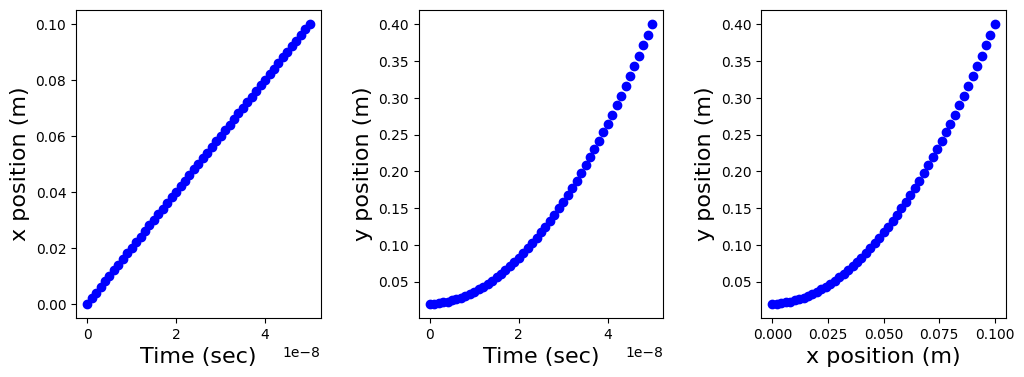

In [14]:
plt.figure(figsize=(12,4))
plt.subplots_adjust(wspace=.4)
plt.subplot(1,3,1)
plt.plot(time,x,'bo')
plt.xlabel("Time (sec)",fontsize=16)
plt.ylabel("x position (m)",fontsize=16)
plt.subplot(1,3,2)
plt.plot(time,y,'bo')
plt.xlabel("Time (sec)",fontsize=16)
plt.ylabel("y position (m)",fontsize=16)
plt.subplot(1,3,3)
plt.plot(x,y,'bo')
plt.ylabel("y position (m)",fontsize=16)
plt.xlabel("x position (m)",fontsize=16)

# Part 3: Graphing

### Part 3a

(5 points)

*From Gilat*

The radial probability density $P_r(n)$ for an excited hydrogen atom at the first excited state (quantum numbers $n=2$ and $l=0$) is given by:

$$ P_r(n) = \frac{1}{8 a_0} \left(\frac{r}{a_0}\right)^2 \left(2 - \frac{r}{a_0}\right) e^{(-r/a_0)} $$

where $a_0 = 52.2 \times 10^{-11}$ m is the Bohr radius.

Make a plot of $P_r$ as a function of $r/a_0$, for $0 \le r/a_o \le 15$.

Text(0, 0.5, 'Probability')

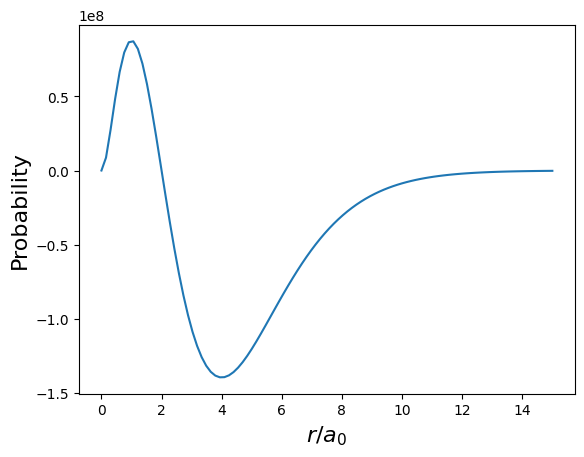

In [15]:
# your code here
ra = np.linspace(0,15,100)
a0 = 52.5e-11

Pr = 1/(8*a0)*(ra)**2*(2-ra)*np.exp(-1*ra)

plt.figure()
plt.plot(ra,Pr)
plt.xlabel("$r/a_0$",fontsize=16)
plt.ylabel("Probability",fontsize=16)

### Part 3 b

(5 points)

Plot the function $f(x) = 3 x sin(x) -2x$ and its derivative, both on the same plot. for $-2\pi \le x \le 2\pi$.  

Plot the function with a solid line, and the derivative with the dashed line.  Add a legend and label the axes.



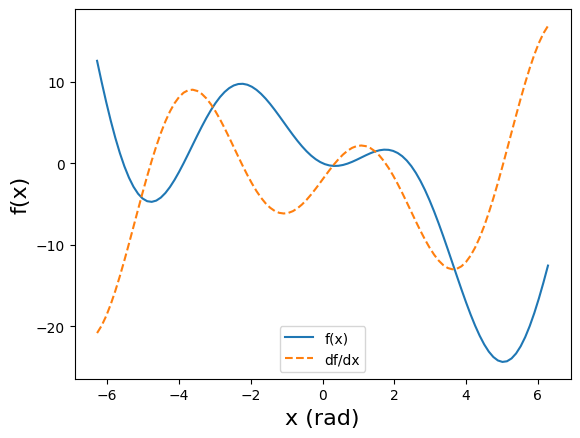

In [16]:
# your code here
x = np.linspace(-2*np.pi,2*np.pi,100)
fx = 3*x*np.sin(x)-2*x

fprime = 3*x*np.cos(x) + 3*np.sin(x)-2

plt.figure()

plt.plot(x,fx,label="f(x)")
plt.plot(x,fprime,label="df/dx",ls='--')
plt.xlabel('x (rad)',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.legend()